## First Workflow in LangGraph 
**BMI** Calculator

In [28]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [29]:
#  Define state

class BMIState(TypedDict):
  height_cm: float
  weight_kg: float
  bmi: float
  category: str

In [30]:
def calculate_bmi(state: BMIState) -> BMIState:
   weight_kg = state["weight_kg"]
   height_cm = state["height_cm"]
   
   
   bmi = weight_kg / (height_cm / 100) ** 2
   
   state['bmi'] = round(bmi,2)
   return state


In [31]:
def categorize_bmi(state: BMIState) -> BMIState:
  # Categorize BMI
  bmi = state["bmi"]
  if bmi < 18.5:
    state["category"] = "Underweight"
  elif bmi < 25:
    state["category"] = "Normal weight"
  else:
    state["category"] = "Overweight"
  return state

In [32]:
# Define your graph
graph = StateGraph(BMIState)


# Add nodes to your graph
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("categorize_bmi", categorize_bmi)


# Add edges to your graph
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "categorize_bmi")
graph.add_edge("categorize_bmi", END)



# Compile your graph
workflow = graph.compile()












In [33]:
# Execute your graph
initial_state = {"height_cm": 170, "weight_kg": 70}



final_state = workflow.invoke(initial_state)

print(final_state)

{'height_cm': 170, 'weight_kg': 70, 'bmi': 24.22, 'category': 'Normal weight'}


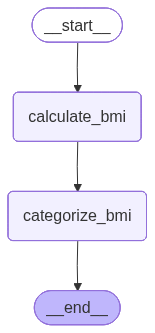

In [34]:
# Visualize your graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())